In [1]:
# Distrubutuion of boundary strengths for matrix and deep data

In [2]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')
import multiprocess as mp
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler
#import bbi
from cooltools import snipping
from cooltools.lib import numutils

In [3]:
path=cooler_path

filename1="U54-HFF-plate-FA-DpnII-20180904-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename2="U54-HFFc6-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename3="U54-HFF-plate-DSG-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename4="U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename5="U54-HFF-plate-DSG-MNase-20190509-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename6="U54-HFFc6-FA-DSG-MNase-R1-R3_hg38.mapq_30.1000.mcool"

In [8]:
path=cooler_path

filename1="U54-ESC-FA-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename2="U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename3="U54-ESC-DSG-DpnII-20160722-R1-T1__hg38.hg38.mapq_30.1000.mcool"
filename4="U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename5="U54-ESC-DSG-MNase-20170508-R2-T1__hg38.hg38.mapq_30.1000.mcool"
filename6="U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38.mapq_30.1000.mcool"

In [9]:
exp_path=exp_path
insulation_path=insulation_path


hg38 = bioframe.fetch_chromsizes('hg38')
chromsizes = bioframe.fetch_chromsizes('hg38')
chromosomes = list(chromsizes.index)

print(filename1,filename2,filename3,filename4,filename5,filename6)

conditions = ['FA_DpnII','FA_DpnII_Deep','DSG_DpnII','DSG_DpnII_Deep','DSG_MNase','DSG_MNase_Deep']


cool = [filename1,filename2,filename3,filename4,filename5,filename6]


cooler_paths = {    
    'FA_DpnII' : path+filename1+'::/resolutions/10000',
    'FA_DpnII_Deep' : path+filename2+'::/resolutions/10000',
    'DSG_DpnII' : path+filename3+'::/resolutions/10000',
    'DSG_DpnII_Deep' : path+filename4+'::/resolutions/10000',
    'DSG_MNase' : path+filename5+'::/resolutions/10000',
    'DSG_MNase_Deep' : path+filename6+'::/resolutions/10000'
    
}


long_names = {
    'FA_DpnII': 'FA_MNase',
    'DSG_DpnII':'DSG_DpnII',
    'DSG_MNase': 'DSG_MNase',
    'FA_DpnII_Deep' :'FA_DpnII_Deep' ,
    'DSG_DpnII_Deep' :'DSG_DpnII_Deep' ,
    'DSG_MNase_Deep' :'DSG_MNase_Deep' ,
}

ins_name_list=[file.split(".")[0]+".bed" for file in cool]   

insulation_path={
    'FA_DpnII' : insulation_path+ins_name_list[0],
    'FA_DpnII_Deep' : insulation_path+ins_name_list[1],
    'DSG_DpnII' : insulation_path+ins_name_list[2],
    'DSG_DpnII_Deep' : insulation_path+ins_name_list[3],
    'DSG_MNase' : insulation_path+ins_name_list[4],
    'DSG_MNase_Deep' : insulation_path+ins_name_list[5]
}


clrs = {
    cond: cooler.Cooler(cooler_paths[cond]) for cond in conditions
}

U54-ESC-FA-DpnII-20170119-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool U54-ESC-DSG-DpnII-20160722-R1-T1__hg38.hg38.mapq_30.1000.mcool U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool U54-ESC-DSG-MNase-20170508-R2-T1__hg38.hg38.mapq_30.1000.mcool U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38.mapq_30.1000.mcool


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


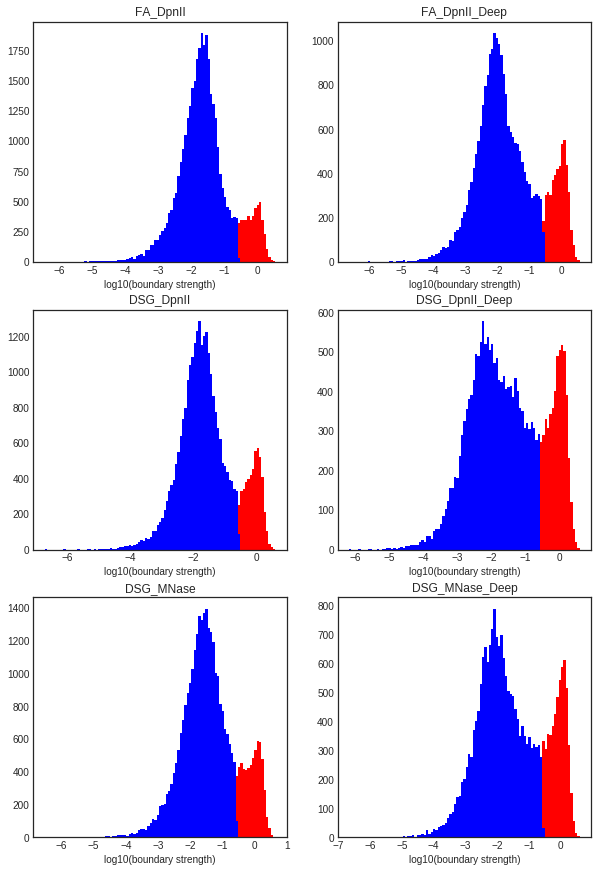

In [14]:
gs = GridSpec(nrows=3, ncols=2)
plt.figure(figsize=(10,15))
new_data=pd.DataFrame()
all_m=[]
names = ['FA_DpnII','FA_DpnII_Deep','DSG_DpnII','DSG_DpnII_Deep','DSG_MNase','DSG_MNase_Deep']

for i,cond in enumerate(conditions):
    insulations = pd.read_table(insulation_path[cond])
    insulations.columns=["chrom","start","end","insulation","boundary_strength_200000","category"]
    strong_weak=insulations[insulations["boundary_strength_200000"] !=0]
    m=np.mean(strong_weak["boundary_strength_200000"])
    all_m.append(m)
    #name=insulation_path[cond].split("/")[-1].split(".")[0]
    #print(name)
    insulations = strong_weak.dropna()
    x = np.log10(strong_weak['boundary_strength_200000'].values)
    bins = np.linspace(x.min(), x.max(), num=100)
    mask=strong_weak["boundary_strength_200000"].values >= 0.27
    #mask=insulations["boundary_strength_200000"].values >= 0.1
    ax = plt.subplot(gs[i])
    ax.set_xlabel('log10(boundary strength)')
    ax.hist(x[mask], bins=bins, color='r',density=False)
    ax.hist(x[~mask], bins=bins, color='b',density=False)
    ax.set_title(names[i])
    #ax.hist(np.log10(col2),alpha=0.5)
#plt.savefig("ESC_deep_vs_not_deep_log10_boundary_strength_0.27.pdf")